In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import os
import subprocess
import sys
import shutil

import codecs

In [ ]:
from libraryIR import *
path_to_pool = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"     

### We execute Condorcet, Condorcet Weighted,CondorcetML, CondorcetLog on a random set of systems and we progressively increased the number of systems used

In [27]:
path = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\RankFusion"     
dir_in = "input"   
dir_w = "weights"     
dir_w_ml="weights_ml"
dir_w_log="weights_log"
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed=1156818)

results={}
        

for i in range(1,len(filename_list)+1,1):
    print i
    repeat=1
    
    results[i]={"condorcet.txt":0,"condorcetWeighted.txt":0,"condorcetML.txt":0,"condorcetLog.txt":0}
    for j in range(0,repeat,1):
        perm=np.random.permutation(filename_list)[0:i]
        print "Ripetizione numero: "+str(j)
        #print perm
        #Calcolo condorcet e condercet_pesato
        condorcet_alg(perm, path, dir_norm, dir_comb)
        MAP=take_MAP(path,dir_comb,dir_w,"condorcet.txt",False)#calcolo il MAP
        results[i]["condorcet.txt"]+=MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w)
        MAP=take_MAP(path,dir_comb,dir_w,"condorcetWeighted.txt",False)#calcolo il MAP
        results[i]["condorcetWeighted.txt"]+=MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w_ml,"condorcetML.txt")
        MAP=take_MAP(path,dir_comb,dir_w,"condorcetML.txt",False)#calcolo il MAP
        results[i]["condorcetML.txt"]+=MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w_log,"condorcetLog.txt")
        MAP=take_MAP(path,dir_comb,dir_w,"condorcetLog.txt",False)#calcolo il MAP
        results[i]["condorcetLog.txt"]+=MAP        
    #calcolo media per i sistemi    
    results[i]["condorcet.txt"]=results[i]["condorcet.txt"]/repeat
    results[i]["condorcetWeighted.txt"]=results[i]["condorcetWeighted.txt"]/repeat
    results[i]["condorcetML.txt"]=results[i]["condorcetML.txt"]/repeat
    results[i]["condorcetLog.txt"]=results[i]["condorcetLog.txt"]/repeat

1
Ripetizione numero: 0
Ripetizione numero: 1
Ripetizione numero: 2
Ripetizione numero: 3
Ripetizione numero: 4
2
Ripetizione numero: 0
Ripetizione numero: 1
Ripetizione numero: 2
Ripetizione numero: 3
Ripetizione numero: 4
3
Ripetizione numero: 0
Ripetizione numero: 1
Ripetizione numero: 2
Ripetizione numero: 3
Ripetizione numero: 4
4
Ripetizione numero: 0
Ripetizione numero: 1
Ripetizione numero: 2
Ripetizione numero: 3
Ripetizione numero: 4
5
Ripetizione numero: 0
Ripetizione numero: 1
Ripetizione numero: 2
Ripetizione numero: 3
Ripetizione numero: 4
6
Ripetizione numero: 0
Ripetizione numero: 1
Ripetizione numero: 2
Ripetizione numero: 3
Ripetizione numero: 4
7
Ripetizione numero: 0
8
Ripetizione numero: 0
9
Ripetizione numero: 0
10
Ripetizione numero: 0


In [28]:
print results

{1: {'condorcet.txt': 0.07279490096225999, 'condorcetML.txt': 0.07279490096225999, 'condorcetWeighted.txt': 0.07279490096225999, 'condorcetLog.txt': 0.07279490096225999}, 2: {'condorcet.txt': 0.07335329191174, 'condorcetML.txt': 0.07607955962968001, 'condorcetWeighted.txt': 0.07749542777228, 'condorcetLog.txt': 0.07607955962968001}, 3: {'condorcet.txt': 0.07822214922924, 'condorcetML.txt': 0.07717030913264, 'condorcetWeighted.txt': 0.07822295138344, 'condorcetLog.txt': 0.07684903312402}, 4: {'condorcet.txt': 0.07664187804744, 'condorcetML.txt': 0.07591676389386001, 'condorcetWeighted.txt': 0.07881017267824, 'condorcetLog.txt': 0.07692511873044}, 5: {'condorcet.txt': 0.07789801266368, 'condorcetML.txt': 0.07559469191816, 'condorcetWeighted.txt': 0.07792408646638, 'condorcetLog.txt': 0.07759052047414}, 6: {'condorcet.txt': 0.07656936111664, 'condorcetML.txt': 0.07578351905496, 'condorcetWeighted.txt': 0.0774978049343, 'condorcetLog.txt': 0.07673877153374001}, 7: {'condorcet.txt': 0.07693

In [29]:
keys=results.keys()
x=[]+keys
y1=[]
y2=[]
y3=[]
y4=[]

for i in range(1,len(keys)+1):
    y1.append(results[i]['condorcet.txt'])
    y2.append(results[i]['condorcetWeighted.txt'])
    y3.append(results[i]['condorcetML.txt'])
    y4.append(results[i]['condorcetLog.txt'])

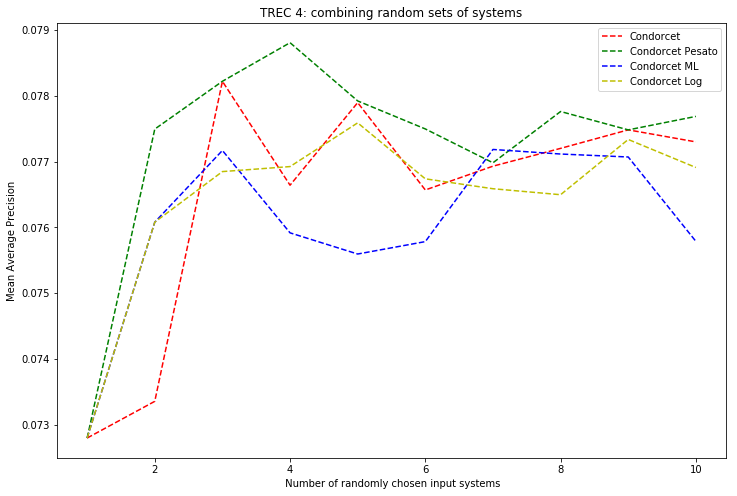

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]

plt.xlabel(' Number of randomly chosen input systems')
plt.ylabel('Mean Average Precision')
plt.title('TREC 4: combining random sets of systems')
plt.plot(x,y1,'r--',x,y2,'g--',x,y3,'b--',x,y4,'y--')
plt.legend(["Condorcet","Condorcet Pesato","Condorcet ML","Condorcet Log"])
plt.show()